In [124]:
import pandas as pd
import itertools as it
import collections as c
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('rslp')
stopwords = nltk.corpus.stopwords.words('portuguese')
stemmer = nltk.stem.RSLPStemmer()
x = pd.read_csv("./results.csv")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leonardo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Leonardo\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [125]:
#pegar todas as palavras dos textos
words = []
for text in x.texto:
    
    pv = str(text).replace("nan","")
    pv = pv.replace(" nan","")
    pv = pv.replace(" nan ","")
    words += pv.split()
    
#tokenização

aux = words 
words = []

#-------------------------------------Questão 1 -----------------------------------------------------
#Escolha uma estratégia de tokenização para a coleção que você está usando e justifique sua estratégia. 
#É importante que você inclua decisões adicionais em relação ao que foi feito no Laboratório


#estrategias
#1 remover virgulas
#2 substituir ponto final por espaço para representaão de números com .
#3 O mesmo que o 2 porém para hifen
#4 Colocar tudo em lower case
#5 remover palavras com menos de 3 letras


# Remover as palavras de comprimento 3 foi de suma importancia antes o top do ranking era a palavra "de"
# Agora é a palavra governo , troquei hifens e pontos por espaços a fim de igualar palavras , passei todas 
# as palavras para lower case antes havia uma diferença entre Governo e governo , agora ambos são vistos como a mesma palavra


for word in aux :
    pv = str(word).replace(",", "")
    pv = pv.replace("."," ")
    pv = pv.replace("–"," ")
    pv = pv.lower()
    
    if(len(pv) >= 3 and (pv not in stopwords)):
        words.append(pv)
    


#contar frequencia de palavras
repetidos = c.Counter(words)



mtt = 0 #palavras que ocorreram 1000 ou mais vezes
once = 0 #palavras que ocorreram apenas uma vez

for i in repetidos.keys():
    k = repetidos[i]
    if(k >=1000):
        mtt+=1
    
    if(k == 1) :
        once += 1

In [126]:
#Preparando dados da tabela
total_documents = len(x.index)
total_word_occurrences = len(words)
vocabulary_size = len(set(words))
words_occurring_1000_or_more_times = mtt
words_occurring_once = once

In [127]:
#tabela 4.1
tabela1 = pd.Series([total_documents,total_word_occurrences,vocabulary_size,words_occurring_1000_or_more_times,words_occurring_once], 
                    index=["Total documents", "Total word occurrences", "Vocabulary size", "Words_occurring > 1000 times", "Words occurring once"])
tabela1

Total documents                   193
Total word occurrences          34997
Vocabulary size                 12317
Words_occurring > 1000 times        0
Words occurring once             7830
dtype: int64

In [128]:
# preparando tabela 4.2

def aux3(a):
    if(repetidos.get(a) != "None" and repetidos.get(a) != []):
        return repetidos.get(a)
    else :
        return 0

def aux4(a):
    
    if(isinstance(a,int)):
        return a/total_word_occurrences
    else :
        return 0

def aux5(a):
    return a*probabilidade[a-1]

palavras = (sorted(repetidos.keys(), key=repetidos.get,reverse=True))
ocorrencias = [aux3(x) for x in palavras]
ranking = list(range(1,len(palavras)+1))
probabilidade = [aux4(y) for y in ocorrencias]
rp = [aux5(w) for w in ranking]

In [129]:
#tabela 4.2

# ---------------------------------------------Questão 2 --------------------------------------
#Refaça a questão 2 do Laboratório anterior usando os tokens produzidos

df = pd.DataFrame({'Word' : (palavras[:50]),
                   'Freq' : (ocorrencias[:50]),
                   'r' : (ranking[:50]),
                   'Pr(%)': (probabilidade[:50]),
                    'r.Pr':(rp[:50])})
df

,Word,Freq,r,Pr(%),r.Pr
0,governo,207,1,0.005915,0.005915
1,presidente,182,2,0.005200,0.010401
2,disse,165,3,0.004715,0.014144
3,sobre,144,4,0.004115,0.016459
4,ser,135,5,0.003857,0.019287
5,bolsonaro,135,6,0.003857,0.023145
6,ainda,96,7,0.002743,0.019202
7,pessoas,90,8,0.002572,0.020573
8,anos,87,9,0.002486,0.022373
9,ter,83,10,0.002372,0.023716


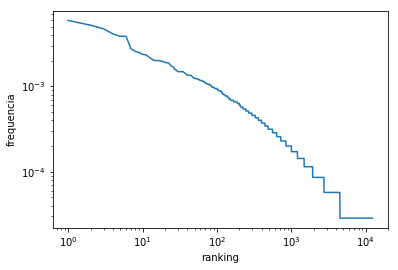

In [130]:
plt.plot((ranking),(probabilidade))
plt.ylabel('frequencia')
plt.xlabel("ranking")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [131]:


def aux6(n):
    return (1/((n+1)*n))    
def aux7(n):
    return n/sum(qtdPalavras)

r1 =  sorted(repetidos.values())
r = c.Counter(r1)
nOcorrencias = sorted(r)
qtdPalavras = [r.get(x) for x in nOcorrencias]
pp = [aux6(x) for x in nOcorrencias]   #proporção prevista
pr = [aux7(x) for x in qtdPalavras]    #proporção real


dfa = pd.DataFrame({'Number of Ocurrencies (n)' : nOcorrencias ,
                   'Predict proportions' : pp,
                   'Actual proportion' : pr,
                   'Actual Number of the words': qtdPalavras})

dfa


,Number of Ocurrencies (n),Predict proportions,Actual proportion,Actual Number of the words
0,1,0.500000,0.635707,7830
1,2,0.166667,0.141755,1746
2,3,0.083333,0.066006,813
3,4,0.050000,0.036210,446
4,5,0.033333,0.022408,276
5,6,0.023810,0.016644,205
6,7,0.017857,0.012747,157
7,8,0.013889,0.010149,125
8,9,0.011111,0.006901,85
9,10,0.009091,0.006252,77


In [132]:
#Stremming
# -----------------------------------Questão 3-------------------------------------------------

#Aplique Stemming nos tokens produzidos e encontre 10 exemplos de 
#falsos positivos e 10 exemplos de falsos negativos. Que impacto você acha que falsos positivos e negativos, 
#como esses, teriam no processamento de consultas? Dê exemplos.

stemmingWords = ([stemmer.stem(x) for x in words])
aux8 = stemmingWords 
stemmingWords = set(stemmingWords)
steming = {}



for x in stemmingWords :
    steming[x] = []
    
for w in words:
    if stemmer.stem(w) in steming:
        # append the new number to the existing array at this slot
        steming[stemmer.stem(w)].append(w)

o = ""
for x in steming.keys():
    o += (x + " : " + str(steming.get(x)) + "\n" )
    

# Falsos Positivos 
#(cobrir,cobrar),(informal,informações),(que,quando),(que,querem),(quando,querem),
#(universo,universidade),(universalizado,universidade),(vizinho,viam),(general,generalizada),(plenario,plano)
    
#Falsos negativos
#(previdenciario,previdenciaria),(especific,específica) ,(equilibr,equilíbrio),(subsidiados,subisidiar),
#(sair,saida ) , (facilitados,facilitar) , (obrigatorio,obrigatoriamente), (apoiar apoiamos)


#remova o comentario da linha a baixo para ver o dicionario de relação de palavras utilizado para fazer a questão anterior

#print(o)


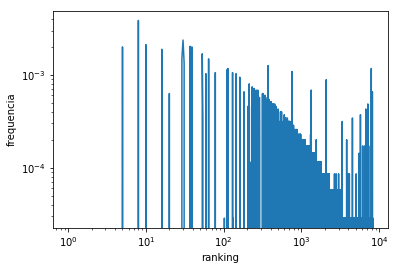

In [134]:
#Questa 4 -------------------------------------------


#Refaça a questão 3 do Laboratório anterior usando os tokens stemizados.
#Você percebeu alguma diferença em relação aos tokens sem stemming? Se sim, quais? (10 pts.)


#Resposta
#Sim , os pontos de pico agora se centralizam em algumas posições do ranking enquanto outras nem tem.



aux8 = c.Counter(aux8)
palavras = (sorted(aux8.keys(), key=aux8.get,reverse=True))
ocorrencias = [aux3(x) for x in palavras]
ranking = list(range(1,len(palavras)+1))
probabilidade = [aux4(y) for y in ocorrencias]
rp = [aux5(w) for w in ranking]



plt.plot((ranking),(probabilidade))
plt.ylabel('frequencia')
plt.xlabel("ranking")
plt.xscale("log")
plt.yscale("log")
plt.show()



